In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops

In [3]:
def load_happy_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train,Y_train,X_test,Y_test,classes=load_happy_dataset()

In [5]:
X_train=X_train/255
X_test=X_test/255
Y_train=Y_train.T
Y_test=Y_test.T

In [6]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


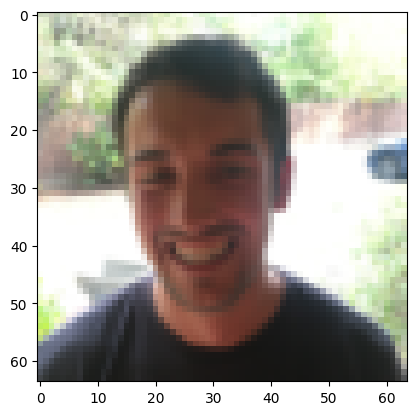

In [7]:
index=12
plt.imshow(X_train[index])

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
    tf.keras.layers.Conv2D(32,(7,7),strides=(1,1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [11]:
model.fit(X_train,Y_train,epochs=50,batch_size=16)

Epoch 1/50
38/38 [==============================] - 3s 53ms/step - loss: 1.0124 - accuracy: 0.7367
Epoch 2/50
38/38 [==============================] - 2s 54ms/step - loss: 0.2149 - accuracy: 0.9283
Epoch 3/50
38/38 [==============================] - 2s 61ms/step - loss: 0.1539 - accuracy: 0.9383
Epoch 4/50
38/38 [==============================] - 3s 72ms/step - loss: 0.1080 - accuracy: 0.9550
Epoch 5/50
38/38 [==============================] - 2s 59ms/step - loss: 0.0840 - accuracy: 0.9667
Epoch 6/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0682 - accuracy: 0.9817
Epoch 7/50
38/38 [==============================] - 3s 70ms/step - loss: 0.0945 - accuracy: 0.9650
Epoch 8/50
38/38 [==============================] - 3s 86ms/step - loss: 0.1494 - accuracy: 0.9333
Epoch 9/50
38/38 [==============================] - 3s 69ms/step - loss: 0.0949 - accuracy: 0.9733
Epoch 10/50
38/38 [==============================] - 2s 60ms/step - loss: 0.0858 - accuracy: 0.9717
Epoch 11/

In [12]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 26ms/step - loss: 0.1402 - accuracy: 0.9533


[0.14015965163707733, 0.95333331823349]

In [13]:
predictions = model.predict(X_test)
print(predictions)
print(np.mean(predictions))

5/5 [==============================] - 0s 25ms/step
[[1.00000000e+00]
 [9.99998093e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.02084386e-01]
 [1.00000000e+00]
 [9.99998510e-01]
 [1.74588326e-03]
 [1.00000000e+00]
 [2.47046730e-04]
 [9.99934673e-01]
 [8.27471539e-02]
 [9.99211133e-01]
 [1.67861372e-01]
 [9.52370954e-07]
 [9.99991596e-01]
 [1.10263390e-08]
 [9.99999881e-01]
 [1.96867461e-07]
 [1.00000000e+00]
 [9.99978721e-01]
 [1.00000000e+00]
 [2.82403026e-02]
 [1.00000000e+00]
 [1.10323384e-07]
 [1.63291091e-07]
 [9.92474198e-01]
 [2.28925887e-03]
 [3.84183452e-02]
 [9.99999881e-01]
 [9.99931097e-01]
 [1.00000000e+00]
 [9.99996781e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.66624144e-01]
 [4.98335203e-03]
 [7.86198416e-06]
 [2.35124389e-06]
 [9.13512886e-01]
 [3.65051767e-03]
 [2.25797086e-03]
 [1.31311908e-03]
 [1.00000000e+00]
 [4.20784199e-05]
 [4.88114722e-08]
 [2.27157983e-07]
 [1.00000000e+00]
 [9.96922381e-07]
 [1.40554596e-06]
 [5.67303550e-06]
 [9.97202158

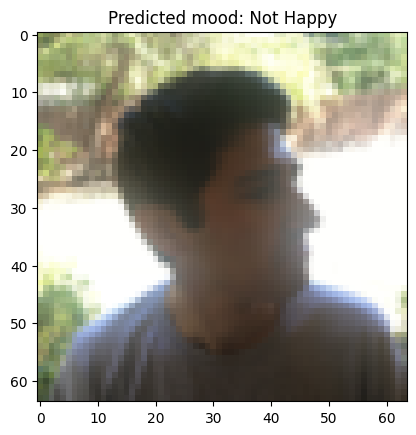

In [19]:
index=18
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.5829557 else "Not Happy"}')
plt.show()

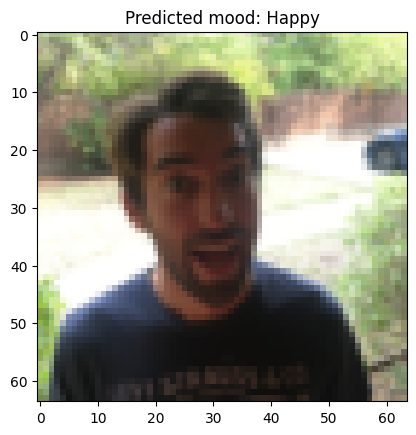

In [15]:
index=15
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()

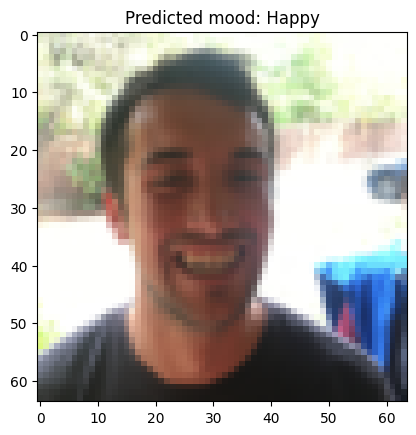

In [20]:
index=55
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()

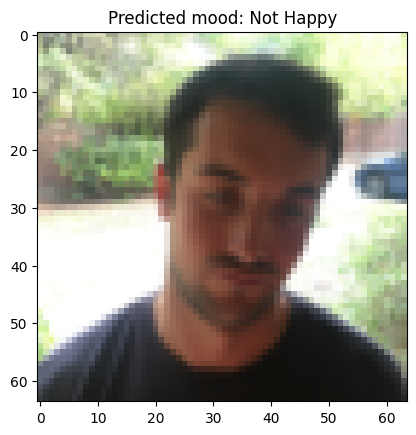

In [22]:
index=72
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()

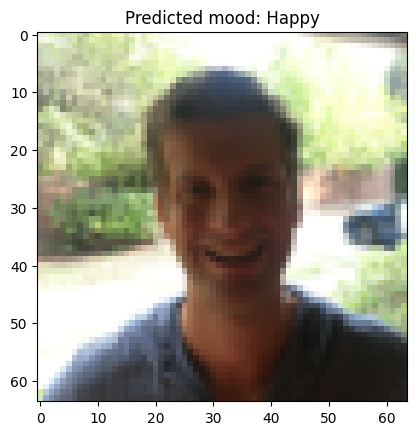

In [25]:
index=56
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()

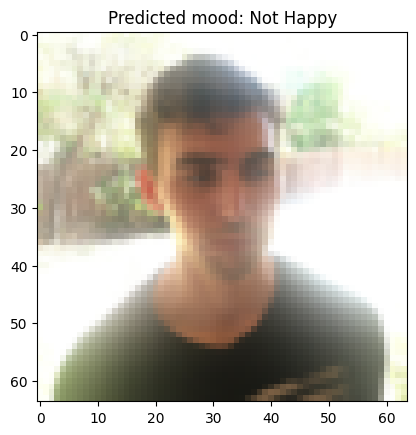

In [26]:
index=90
plt.imshow(X_test[index])
plt.title(f'Predicted mood: {"Happy" if predictions[index][0] > 0.516188 else "Not Happy"}')
plt.show()